# Red Wine Quality 

## Data Set Information:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Importing the required libraries:

In [800]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [801]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [802]:
#checking for value counts
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [803]:
#setting an arbitrary cutoff for the dependent variable wine quality
# 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
for i in range(len(df['quality'])):
    if df['quality'][i] >= 7:
        df['quality'][i] = 1
    else:
        df['quality'][i] = 0

In [804]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

There is class imbalnce problem

In [805]:
#Now the dataset is converted to Classification dataset.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## EDA (Exploratory Data Analysis):

In [806]:
df.shape

(1599, 12)

We have 1599 rows and 12 columns

In [807]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the columns are float , target column is int

In [808]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [810]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in this dataset

In [811]:
#Lets check the skewness of the data
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

Some columns is having High skewness of chlorides = 5, residual sugar having = 4,sulphates =2

Some columns are in skewness range of -0.5 t0 +0.5 like citric acid = 0.318337,density =0.071288 and
pH = 0.193683


In [812]:
# Descriptive analysis or summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### Insight Obtained from this Table :

Every columns is having lot of difference between 75th percentile and max, so there are outliers in all columns

Standard Deviation is also very high in free sulfur dioxide,total sulfur dioxide columns , Means the data is more spreded

Mean and median is almost same for every column, so the data almost normal distibuted

There are no null values in any columns

## Data Visualization:

### Univariate Analysis:

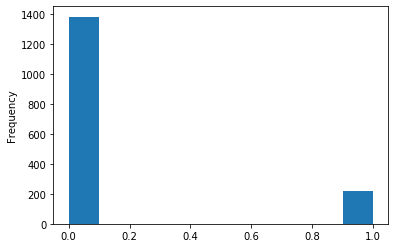

In [813]:
#lets Start with the Target Column
df['quality'].plot.hist()
plt.show()

In [814]:
#We can there is class imbalance Problem in this Dataset
#Since all the values in "quality" column is zero and one, we can use this formula.
sum(df['quality'])/len(df['quality'])

0.1357098186366479

We have only 13.5% of data '1',   86.5% of data is present for '0'

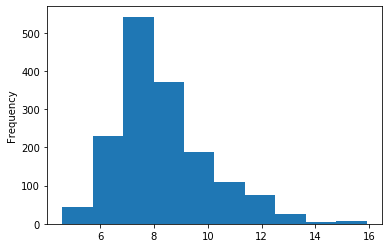

In [815]:
df['fixed acidity'].plot.hist()
plt.show()

data is Right Skewed for the above column

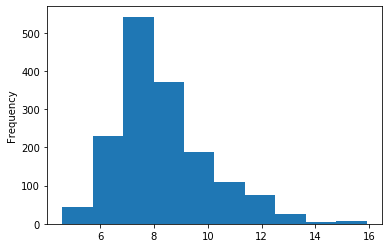

In [816]:
df['fixed acidity'].plot.hist()
plt.show()

data is Right Skewed for the above column

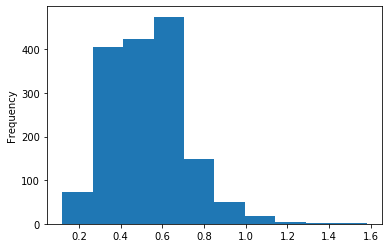

In [817]:
df['volatile acidity'].plot.hist()
plt.show()

Data is slighty noraml distributed for the above column

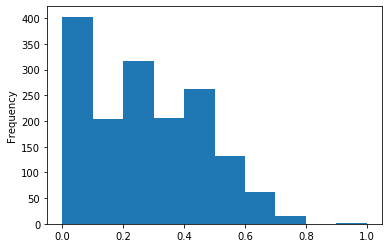

In [818]:
df['citric acid'].plot.hist()
plt.show()

Data is Right Skewed for the above column

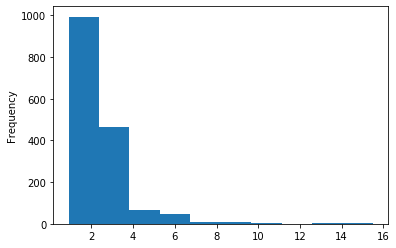

In [819]:
df['residual sugar'].plot.hist()
plt.show()


Data is Right Skewed for the above column

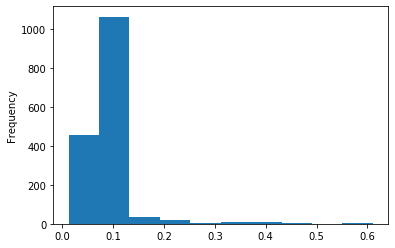

In [820]:
df['chlorides'].plot.hist()
plt.show()

Data is slighty noraml distributed for the above column

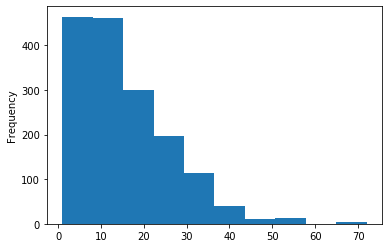

In [821]:
df['free sulfur dioxide'].plot.hist()
plt.show()

Data is Right Skewed for the above column

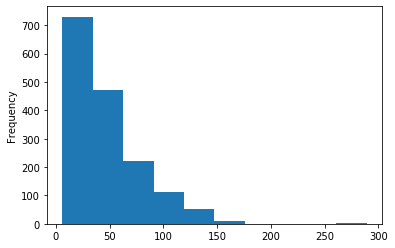

In [822]:
df['total sulfur dioxide'].plot.hist()
plt.show()

Data is Right Skewed for the above column

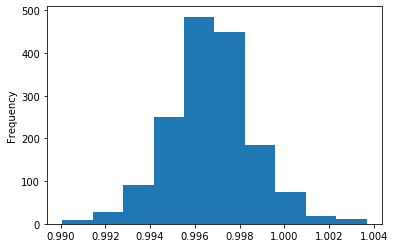

In [823]:
df['density'].plot.hist()
plt.show()


Data is slighty noraml distributed for the above column

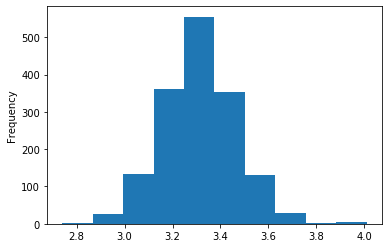

In [824]:
df['pH'].plot.hist()
plt.show()

Data is slighty noraml distributed for the above column

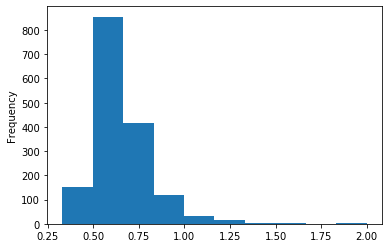

In [825]:
df['sulphates'].plot.hist()
plt.show()

Data is Right Skewed for the above column

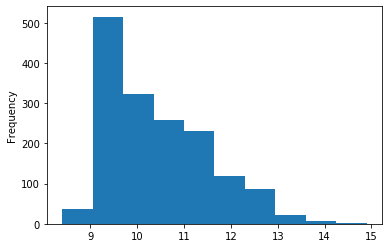

In [826]:
df['alcohol'].plot.hist()
plt.show()

Data is Right Skewed for the above column

### Bivariate Analysis:

In [827]:
#lets make a scatter plot for All the columns againt Target variable

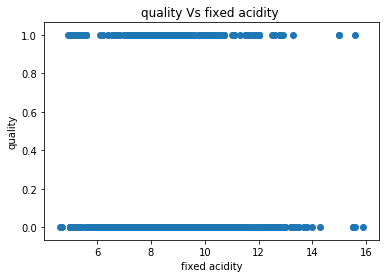

In [828]:
#Lets plot this column against the target variable
plt.scatter(df['fixed acidity'],df['quality'])
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.title('quality Vs fixed acidity ')
plt.show()

In the above plot we can see there is balance in data when plotted with label column

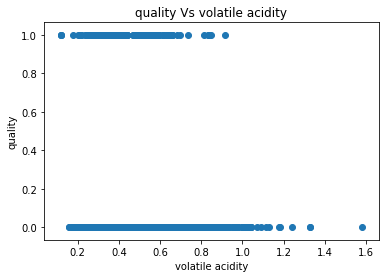

In [829]:


#Lets plot this column against the target variable
plt.scatter(df['volatile acidity'],df['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.title('quality Vs volatile acidity')
plt.show()

In the above plot we can see there is slight balance in data when plotted with label column

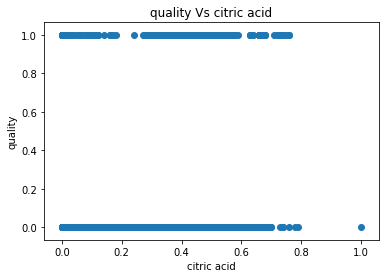

In [830]:
#Lets plot this column against the target variable
plt.scatter(df['citric acid'],df['quality'])
plt.xlabel('citric acid')
plt.ylabel('quality')
plt.title('quality Vs citric acid')
plt.show()


In the above plot we can see there is slight balance in data when plotted with label column

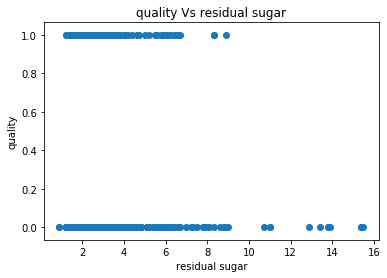

In [831]:

#Lets plot this column against the target variable
plt.scatter(df['residual sugar'],df['quality'])
plt.xlabel('residual sugar')
plt.ylabel('quality')
plt.title('quality Vs residual sugar')
plt.show()

In the above plot we can see there is slight balance in data when plotted with label column

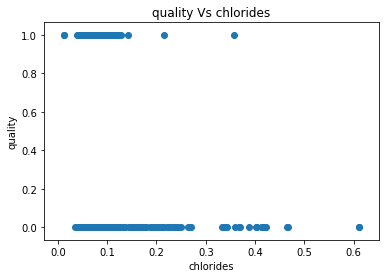

In [832]:
#Lets plot this column against the target variable
plt.scatter(df['chlorides'],df['quality'])
plt.xlabel('chlorides')
plt.ylabel('quality')
plt.title('quality Vs chlorides')
plt.show()

In the above plot we can see there is slight balance in data when plotted with label column

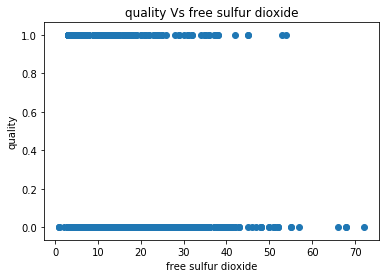

In [833]:

#Lets plot this column against the target variable
plt.scatter(df['free sulfur dioxide'],df['quality'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('quality')
plt.title('quality Vs free sulfur dioxide')
plt.show()

In the above plot we can see there is slight balance in data when plotted with label column

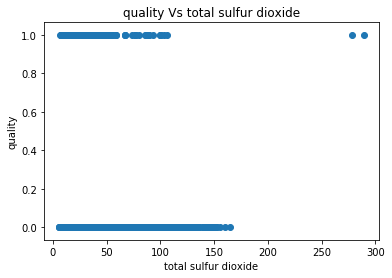

In [834]:
#Lets plot this column against the target variable
plt.scatter(df['total sulfur dioxide'],df['quality'])
plt.xlabel('total sulfur dioxide')
plt.ylabel('quality')
plt.title('quality Vs total sulfur dioxide')
plt.show()


In the above plot we can see there is imbalance in data when plotted with label column

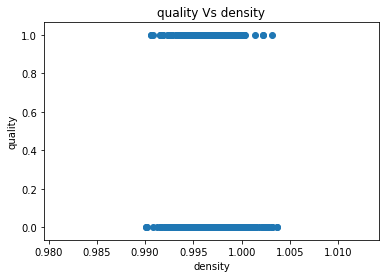

In [835]:
#Lets plot this column against the target variable
plt.scatter(df['density'],df['quality'])
plt.xlabel('density')
plt.ylabel('quality')
plt.title('quality Vs density')
plt.show()


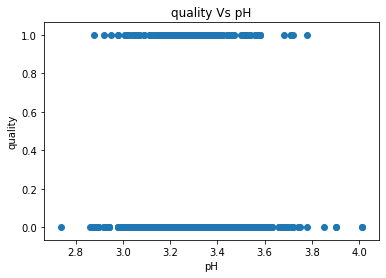

In [836]:
#Lets plot this column against the target variable
plt.scatter(df['pH'],df['quality'])
plt.xlabel('pH')
plt.ylabel('quality')
plt.title('quality Vs pH')
plt.show()


In the above plot we can see there is slight balance in data when plotted with label column

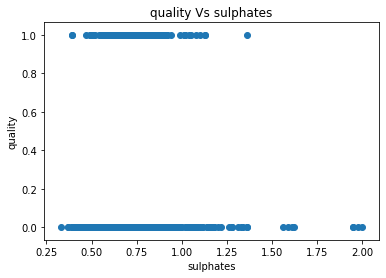

In [837]:


#Lets plot this column against the target variable
plt.scatter(df['sulphates'],df['quality'])
plt.xlabel('sulphates')
plt.ylabel('quality')
plt.title('quality Vs sulphates')
plt.show()


In the above plot we can see there is slight balance in data when plotted with label column

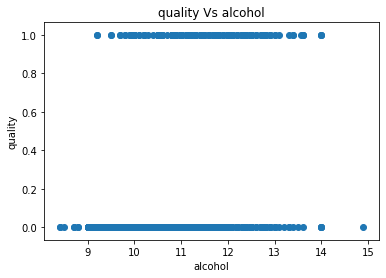

In [838]:


#Lets plot this column against the target variable
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('quality Vs alcohol')
plt.show()

In the above plot we can see there is slight balance in data when plotted with label column

### Multivariate Analysis:

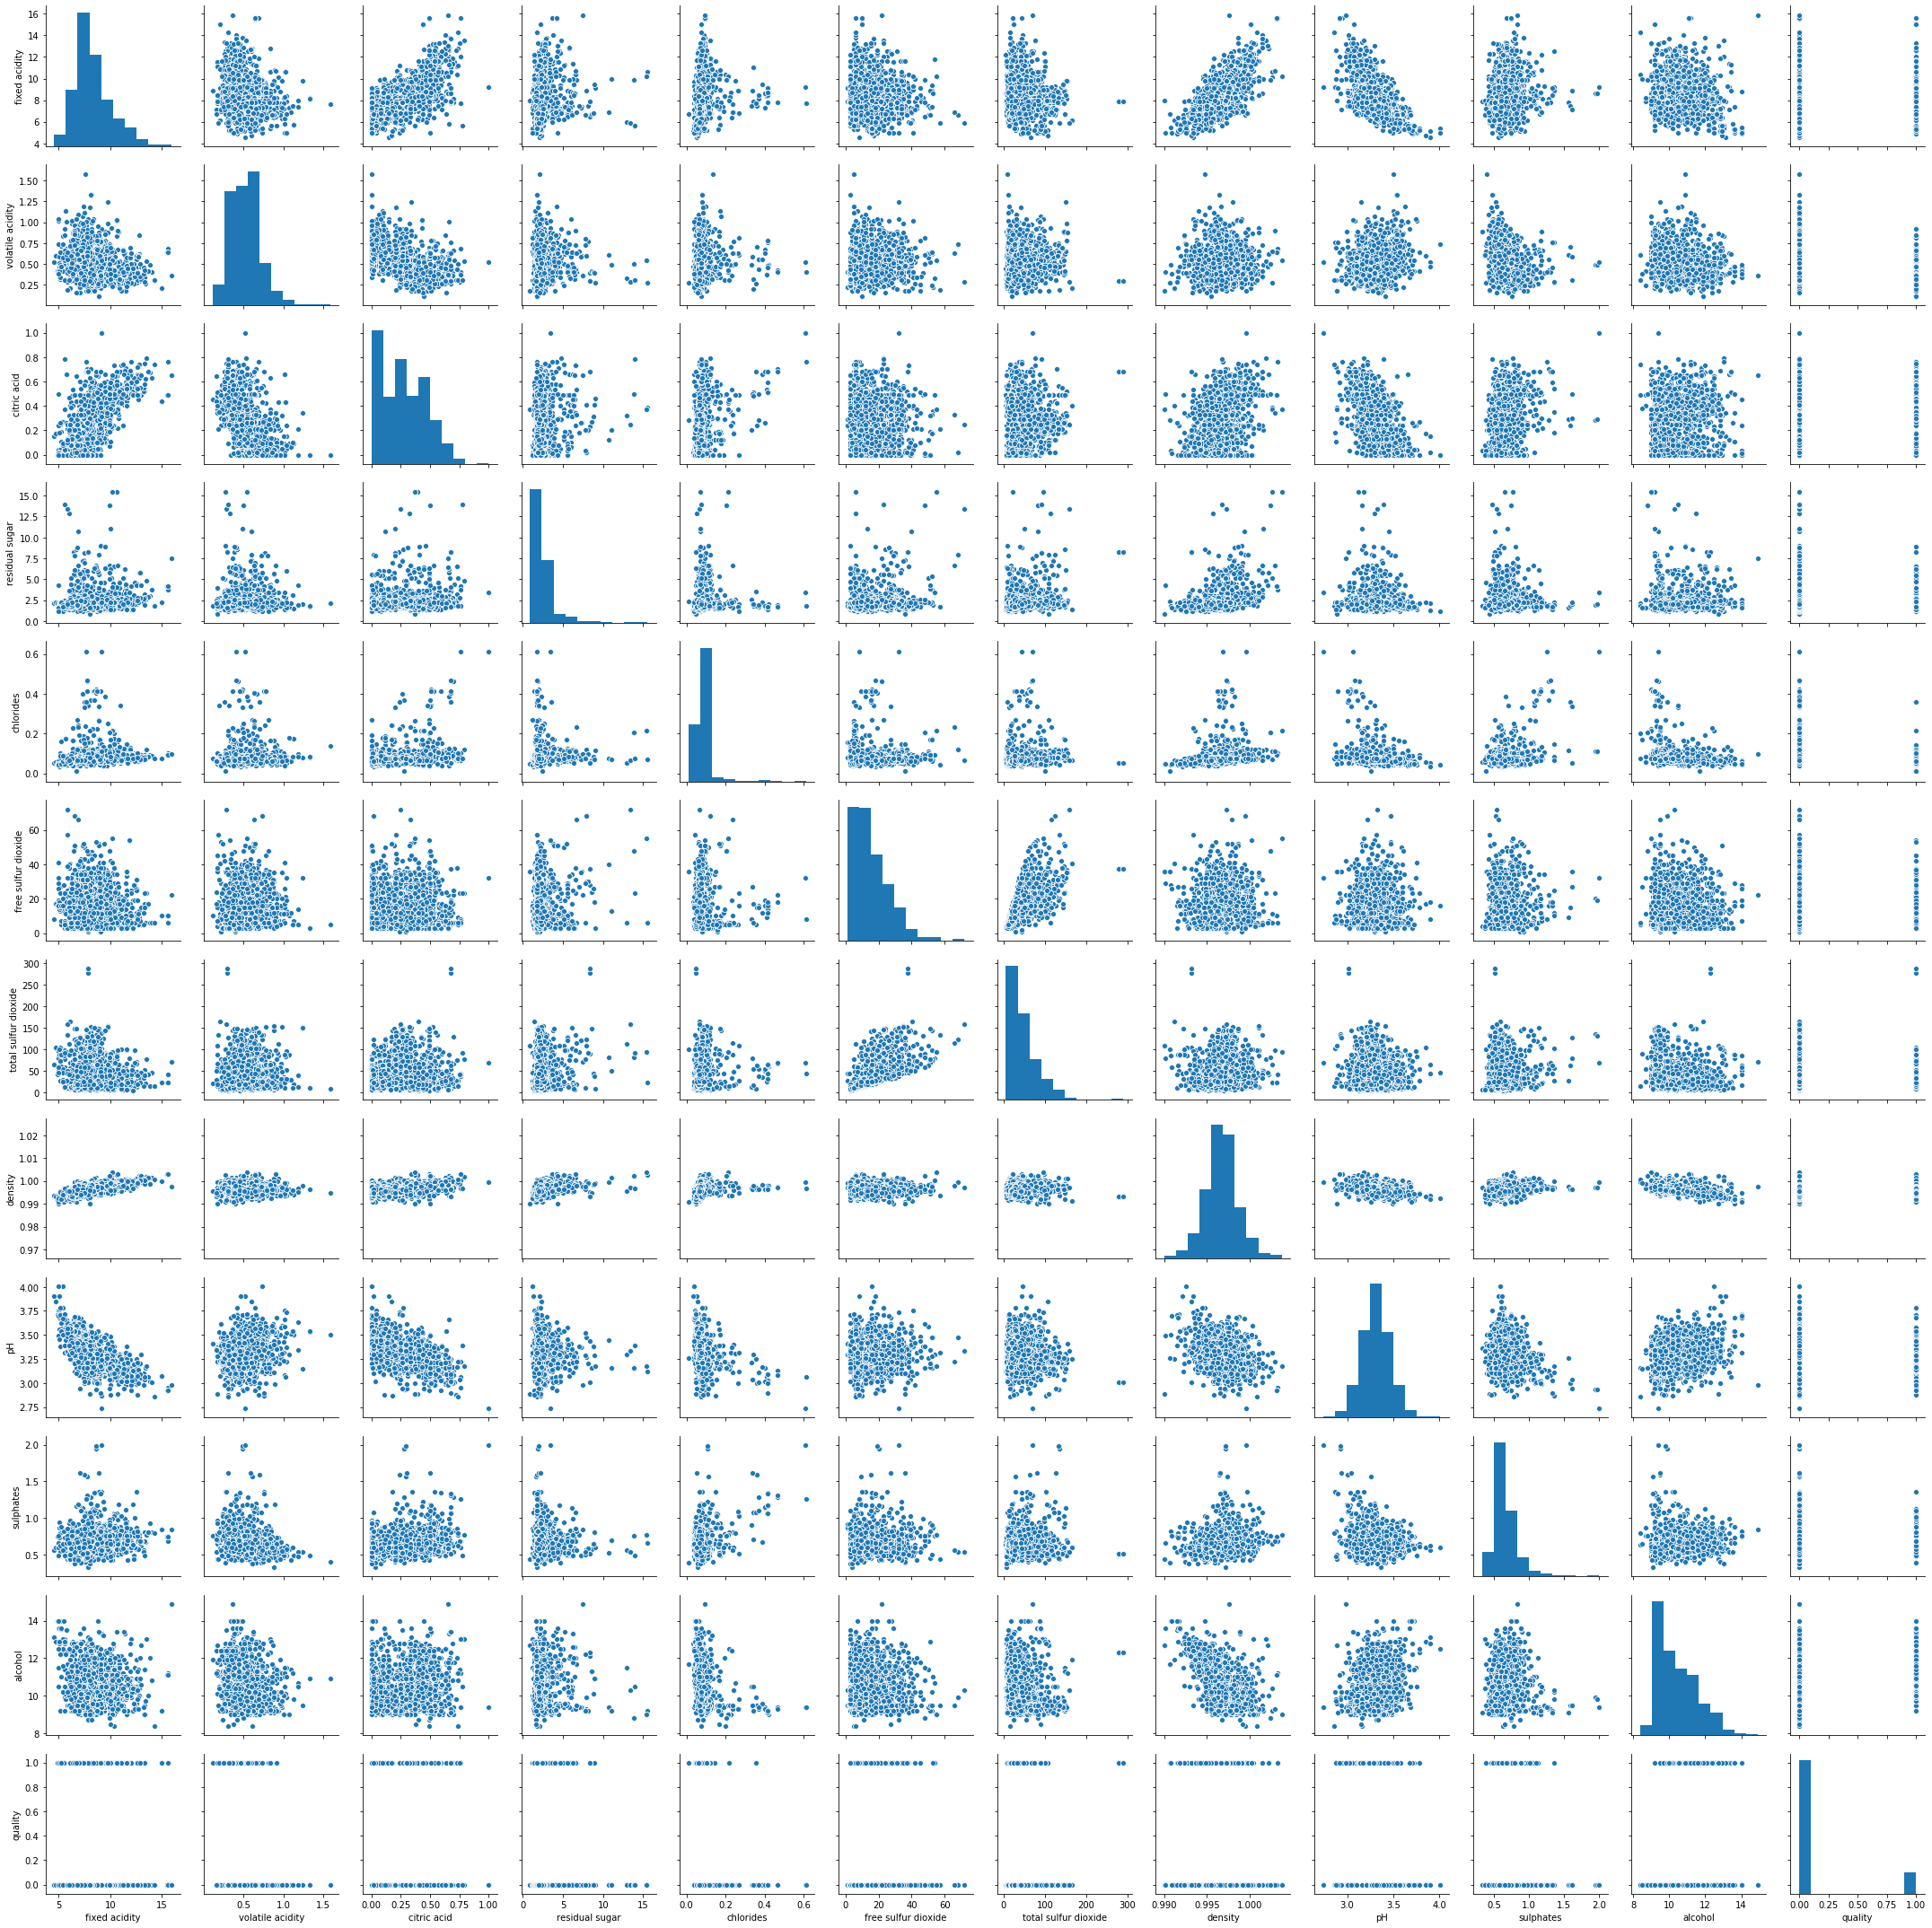

In [839]:
#lets make pairplot to get all columns plotted againt every other column
sns.pairplot(df)

We can all the columns distribution with each each using pairplot

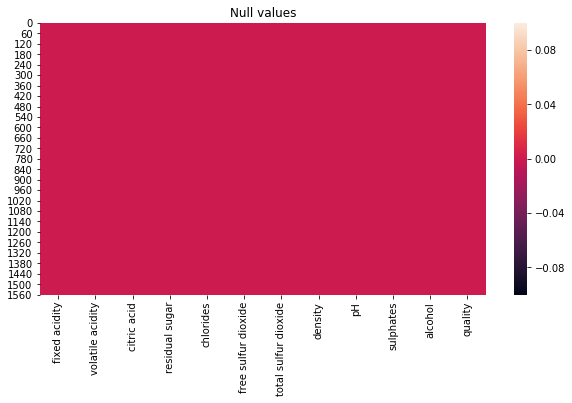

In [840]:
#checking the missing values with visualization technique
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no null values

In [841]:
#checking for correlation between all columns
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


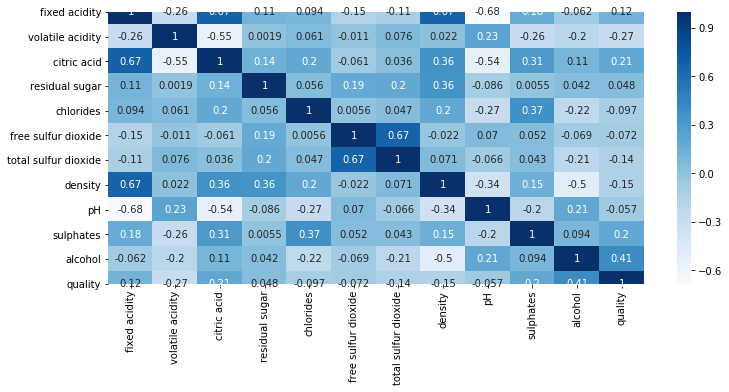

In [842]:
#correlation
fig = plt.figure(figsize=(12,5))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [843]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

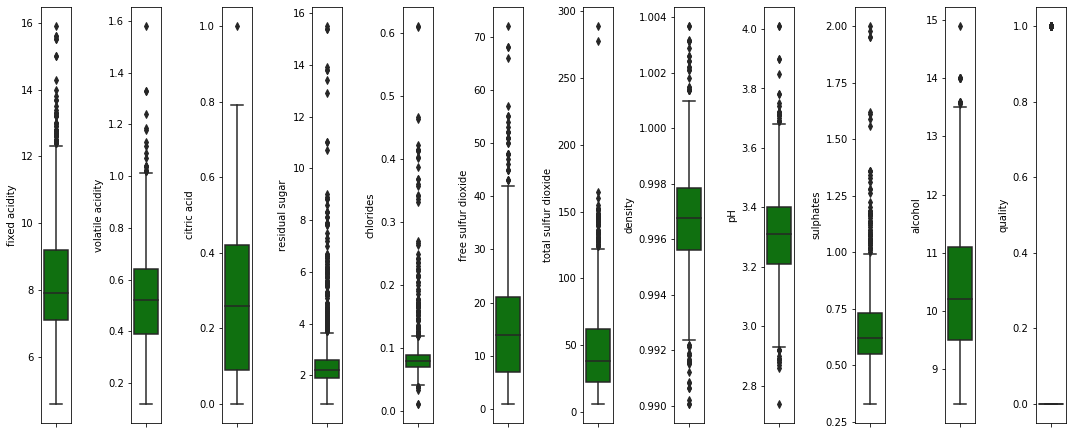

In [844]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

we can see Outliers are present in almost Every columns

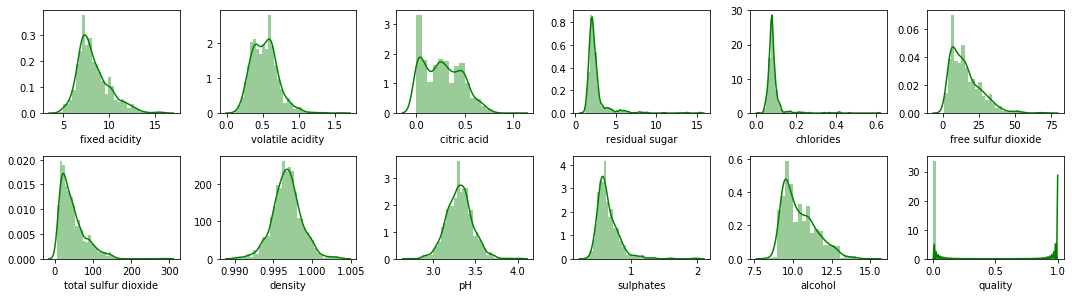

In [845]:
# Lets check the distribution
collist =df.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

## Data Preprocessing:

### Oulier Removal:

In [846]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 3)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 3)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [847]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [848]:
#Replacing the 0utliers with Lower and upper Boundary for these columns
Right_skewed_columns = ['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']
for i in Right_skewed_columns:
    outliers_IQR3(df,i)

In [849]:
#Replacing the 0utliers with Lower and upper Boundary for these columns
normal_distributed_columns = ['fixed acidity','volatile acidity','citric acid','density','pH']
for i in normal_distributed_columns:
    outliers_normally(df,i)

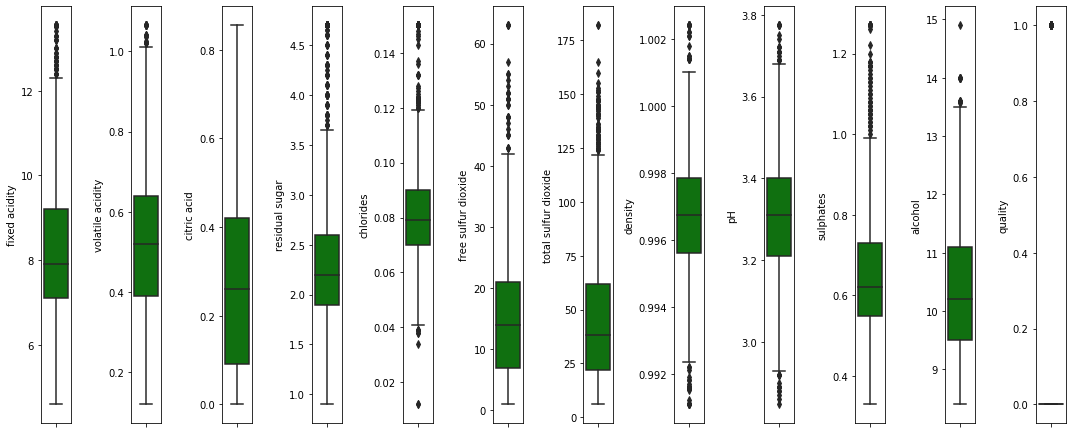

In [850]:
# lets check for outliers among all the columns after using IQR methods for ouliers removal
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

Outliers have been Reduced Comparitively but We can still see there are outliers in some columns

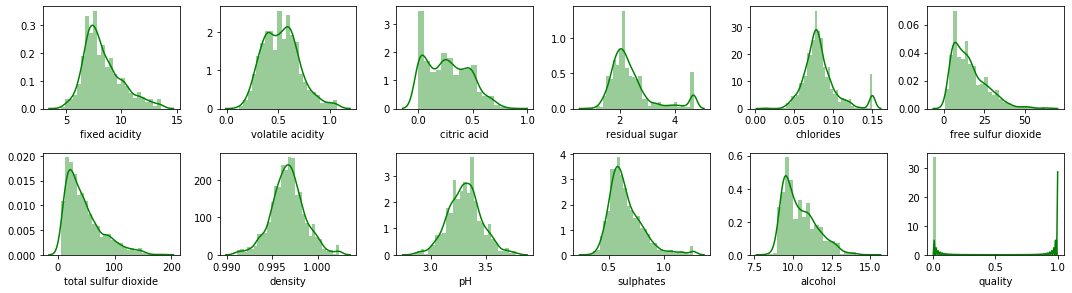

In [851]:
# Lets check the distribution  after using IQR methods for ouliers removal
collist =df.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Data is Now Normal distributed for every columns after some outliers are reduced from IQR method

### Zscore method to remove outliers

In [852]:
#Now lets use Zscore method to remove remaining outliers
#we can use zscore method, since all the data is now noramlly distributed

In [853]:
z = np.abs(zscore(df))
df_new  = df[(z<3).all(axis=1)]
df_new.shape

(1437, 12)

### Skewness Reduction

In [854]:
#skewness Reduction
#lets devide X and Y before handing skewness
Y = df_new['quality']
X = df_new.drop('quality',axis = 1)

In [855]:
X.skew()

fixed acidity           0.833445
volatile acidity        0.381768
citric acid             0.312700
residual sugar          1.656692
chlorides               0.550403
free sulfur dioxide     0.851538
total sulfur dioxide    1.104679
density                 0.060968
pH                      0.091764
sulphates               0.784267
alcohol                 0.759215
dtype: float64

In [856]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = X.columns
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

fixed acidity           0.020499
volatile acidity        0.381768
citric acid             0.312700
residual sugar          0.020144
chlorides              -0.022969
free sulfur dioxide    -0.022689
total sulfur dioxide   -0.010507
density                 0.060968
pH                      0.091764
sulphates               0.021657
alcohol                 0.115938
dtype: float64

Now all the Columns are in the range -0.5 to +0.5

### Data Scaling

In [857]:
#Lets scale the data using minmax scaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.492221,0.630435,0.000000,0.484933,0.463795,0.509581,0.508514,0.588785,0.724138,0.501480,0.291311
1,0.547898,0.826087,0.000000,0.723593,0.667155,0.771503,0.734718,0.495327,0.367816,0.666563,0.420433
2,0.547898,0.695652,0.051282,0.638947,0.615622,0.603786,0.661367,0.514019,0.436782,0.629617,0.420433
3,0.872419,0.173913,0.717949,0.484933,0.453555,0.643448,0.697033,0.607477,0.321839,0.532432,0.420433
4,0.492221,0.630435,0.000000,0.484933,0.463795,0.509581,0.508514,0.588785,0.724138,0.501480,0.291311


Now all the data is in range of 0 and 1 after using min max scaler

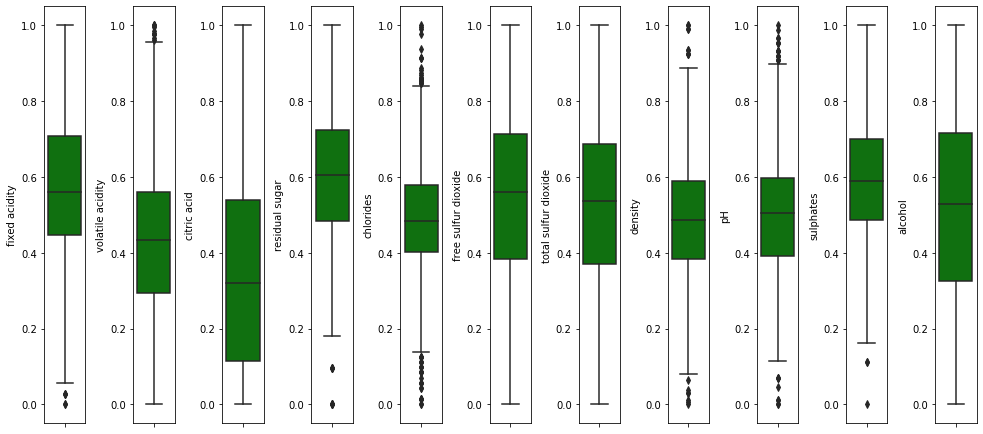

In [858]:
# lets check for outliers among all the columns after Data Preprocessing done
collist =X.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

We can see some outliers present , But are very close the Whiskers so no problem

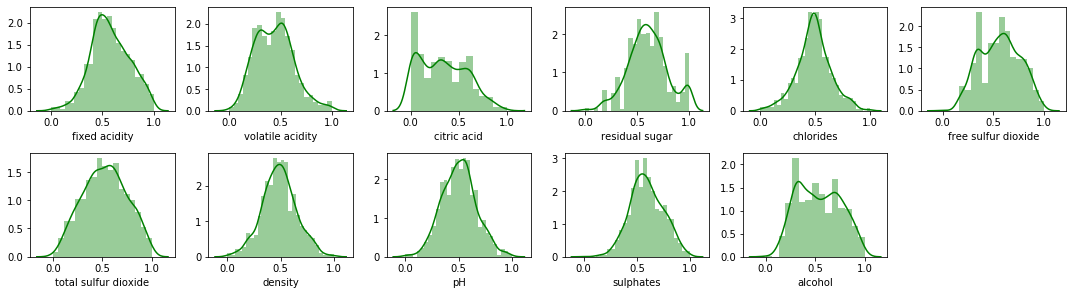

In [859]:
# Lets check the distribution
collist = X.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(X[collist[i]],color='green')
    plt.tight_layout()

Data is Normally Distributed after the PreProcessing is Done

In [860]:
X['quality'] = Y.values
df_final = X

In [861]:
df_final.shape

(1437, 12)

### Class Imbalance Problem:

In [862]:
y = df_final['quality']
x = df_final.drop('quality',axis = 1)

In [863]:
#we can see there is class imbalanve problem in this dataset
y.value_counts()

0    1238
1     199
Name: quality, dtype: int64

In [864]:
#train test split
x_train,x_test,y_train,y_test =  train_test_split(x, y, test_size=0.22, random_state=42)

In [865]:
# First lets check for F1 score with logistic regression
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.861198738170347
[[266   7]
 [ 37   7]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.50      0.16      0.24        44

    accuracy                           0.86       317
   macro avg       0.69      0.57      0.58       317
weighted avg       0.83      0.86      0.83       317



F1 score of '0' is 92% but  for '1' only 0.24

### Method1 :Undersampling

In [866]:
# Class count
count_class_0, count_class_1 = df_final.quality.value_counts()

# Divide by class
df_class_0 = df_final[df_final['quality'] == 0]
df_class_1 = df_final[df_final['quality'] == 1]

In [867]:
count_class_1

199

In [868]:
count_class_0

1238

In [869]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.quality.value_counts())

Random under-sampling:
1    199
0    199
Name: quality, dtype: int64


In [870]:
x = df_test_under.drop('quality',axis='columns')
y = df_test_under['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42, stratify=y)

In [871]:
# Number of classes in training Data
y_train.value_counts()

1    153
0    153
Name: quality, dtype: int64

In [872]:
# Applying the Logistic regression algorithm after undersampling method
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accu = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy is {}'.format(accu))
cv = cross_val_score(lg,x,y,cv =5)
print(cv.mean())
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1)) 

[[41  5]
 [ 9 37]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        46
           1       0.88      0.80      0.84        46

    accuracy                           0.85        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.85      0.85      0.85        92

The accuracy is 0.8478260869565217
0.7992088607594937
f1 score for 0 is 0.8541666666666666 
f1 score for 1 is 0.8409090909090908 


After Under sampling method, F1 score of 1 incresed from 24% to 82%

### Method2: Oversampling

In [873]:
count_class_0

1238

In [874]:
count_class_1

199

In [875]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.quality.value_counts())

Random over-sampling:
1    1238
0    1238
Name: quality, dtype: int64


In [876]:
x = df_test_over.drop('quality',axis='columns')
y = df_test_over['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=48, stratify=y)

In [877]:
y_train.value_counts()

1    953
0    953
Name: quality, dtype: int64

In [878]:
# Applying the Logistic regression algorithm after oversampling method
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accu = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy is {}'.format(accu))
cv = cross_val_score(lg,x,y,cv =5)
print(cv.mean())
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))  

[[218  67]
 [ 49 236]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       285
           1       0.78      0.83      0.80       285

    accuracy                           0.80       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.80      0.80      0.80       570

The accuracy is 0.7964912280701755
0.7976189312479635
f1 score for 0 is 0.7898550724637682 
f1 score for 1 is 0.8027210884353742 


After OverSAmpling Method the F1 score of '1' incresed from 24% t0 79%

### Method3: SMOTE

In [879]:
x = df_final.drop('quality',axis='columns')
y = df_final['quality']

In [880]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    1238
0    1238
Name: quality, dtype: int64

In [881]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.23, random_state=48, stratify=y_sm)

In [882]:
# Number of classes in training Data
y_train.value_counts()

1    953
0    953
Name: quality, dtype: int64

In [883]:
# Applying the Logistic regression algorithm after SMOT method
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accu = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy is {}'.format(accu))
cv = cross_val_score(lg,x,y,cv =5)
print(cv.mean())
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1)) 

[[222  63]
 [ 57 228]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       285
           1       0.78      0.80      0.79       285

    accuracy                           0.79       570
   macro avg       0.79      0.79      0.79       570
weighted avg       0.79      0.79      0.79       570

The accuracy is 0.7894736842105263
0.8782229965156795
f1 score for 0 is 0.7872340425531914 
f1 score for 1 is 0.7916666666666666 


Even through F1 score is High in Undersampling Method, Lets use SMOT method Sinve we have very less rows of data and we can not afford to lose data.

## Lets Check for Best Random State 

In [884]:
#we found our x and y in smote method
x = x_sm
y = y_sm

In [885]:
maxaccu = 0
rand_state = 0
for i in range(1,200):

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= i )
    rf = DecisionTreeClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state)) 


Best accuracy is 0.9219380888290714 on random state 32


In [886]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.23,random_state= rand_state )

we found our best Random state

## Model Selection:

In [887]:
#lets Choose Among this Five Models
dtc = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [888]:
model_list = [dtc,lg,knn,svc,rf,ada]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x,y,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    least_diffrence.append((m,diffrence))
    print('diffrence b/w accurancy score and cross val score is :',diffrence)
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))   



DecisionTreeClassifier()
[[253  32]
 [ 21 264]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       285
           1       0.89      0.93      0.91       285

    accuracy                           0.91       570
   macro avg       0.91      0.91      0.91       570
weighted avg       0.91      0.91      0.91       570

The accuracy of DecisionTreeClassifier() is 0.9070175438596492
cross val score : 0.8776238188334963
diffrence b/w accurancy score and cross val score is : 0.029393725026152895
f1 score for 0 is 0.9051878354203936 
f1 score for 1 is 0.9087779690189328 


LogisticRegression()
[[225  60]
 [ 37 248]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       285
           1       0.81      0.87      0.84       285

    accuracy                           0.83       570
   macro avg       0.83      0.83      0.83       570
weighted avg       0.83      0.83      0.83       570

In [889]:
least_diffrence

[(DecisionTreeClassifier(), 0.029393725026152895),
 (LogisticRegression(), 0.02896108795939023),
 (KNeighborsClassifier(), 0.04243500368712605),
 (SVC(), 0.04393176244619368),
 (RandomForestClassifier(), 0.03275269674675452),
 (AdaBoostClassifier(), 0.04847605940560096)]

In [890]:
#since the Random Forest is having least diffrence between cross val score and accurancy

## Hyperparameter Tuning:

In [891]:
# lets create the parameter list to pass in GridsearchCv
parameters = {'n_estimators': [100,200,300,400,500,600,700,800],'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [892]:
rsv = RandomizedSearchCV(rf,param_distributions= parameters,n_iter=30,n_jobs=-1,cv =8)
rsv.fit(x_train,y_train)
rsv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       n_estimators=700)

In [893]:
rsv.best_params_

{'n_estimators': 700,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'entropy'}

## Creating a Final Model as Random forest:

In [894]:
#using the results from Randomized search CV 
final_mod = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth= 25,min_samples_split=2, min_samples_leaf=1, max_features='auto')
final_mod.fit(x_train,y_train)
pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,pred)
print('The accuracy is {}'.format(accu*100))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))  

The accuracy is 95.96491228070175
[[267  18]
 [  5 280]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       285
           1       0.94      0.98      0.96       285

    accuracy                           0.96       570
   macro avg       0.96      0.96      0.96       570
weighted avg       0.96      0.96      0.96       570

f1 score for 0 is 0.9587073608617593 
f1 score for 1 is 0.9605488850771869 


Now we have final Model with 96% accrancy and 97% f1 score

## Saving the model:

In [895]:
#using joblib for serialization
import joblib
joblib.dump(final_mod,'wine_final.obj')

['wine_final.obj']

In [896]:
wine_final = joblib.load('wine_final.obj')

In [897]:
pred = wine_final.predict(x_test)
accuracy_score(y_test,pred)

0.9596491228070175

## AUC ROC curve :

Since we have random forest as our final , lets check out the auc roc curve and score

In [898]:
final_mod.score(x_train,y_train)

1.0

In [899]:
#lets get probrabalities 
y_pred_prob = final_mod.predict_proba(x_test)[:,1]

In [900]:
#lets get fpr,tpr for plotting AUC ROC CURVE
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

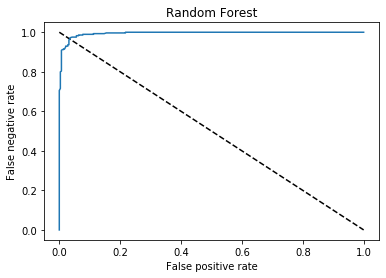

In [901]:
#Auc Roc curve id graphical representation of confusion matrix
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Random Forest')
plt.show()

We can see that Area under the curve is very much, Which means the model has learned more

In [902]:
#lets check out the AUC ROC score for this model
final_mod.fit(x_train,y_train)
rf_pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,rf_pred)
print(accu*100)
print("AUC ROC Score: ",roc_auc_score(y_test,rf_pred))

96.3157894736842
AUC ROC Score:  0.9631578947368421
